In [10]:
import pandas as pd
import numpy as np
import ser
import lib_tree
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score1
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

## 2 class classification

In [32]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S2= pd.read_csv("final_H355.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([ 2.0, 3.0,4.0])].index, 'labels']=1.0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([ 2.0, 3.0,4.0])].index, 'labels']=1.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)
yt = Final_Data_S2.labels
Xt= Final_Data_S2.drop(['Time', 'labels'], axis=1)

In [33]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.85,  stratify=yt,random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()

clf = DecisionTreeClassifier(max_depth=1)
clf = clf.fit(Xs, ys)

In [6]:
SER = copy.deepcopy(clf)
ser.SER(0,SER, X_train_t, y_train_t, original_ser=True)
print('ser original accuracy:', SER.score(X_test_t, y_test_t))
y_pred = SER.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc = roc_auc_score(y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('roc auc:', roc)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser original:")
print(cm)

ser original accuracy: 0.9174008810572687
Weighted F1 score:  0.9162558787561286
precision: [0.92909897 0.88311688]
recall; [0.95884146 0.80952381]
fscore: [0.94373593 0.8447205 ]
roc auc: 0.8841826364692219
support: [656 252]
Confusion Matrix ser original:
[[629  27]
 [ 48 204]]


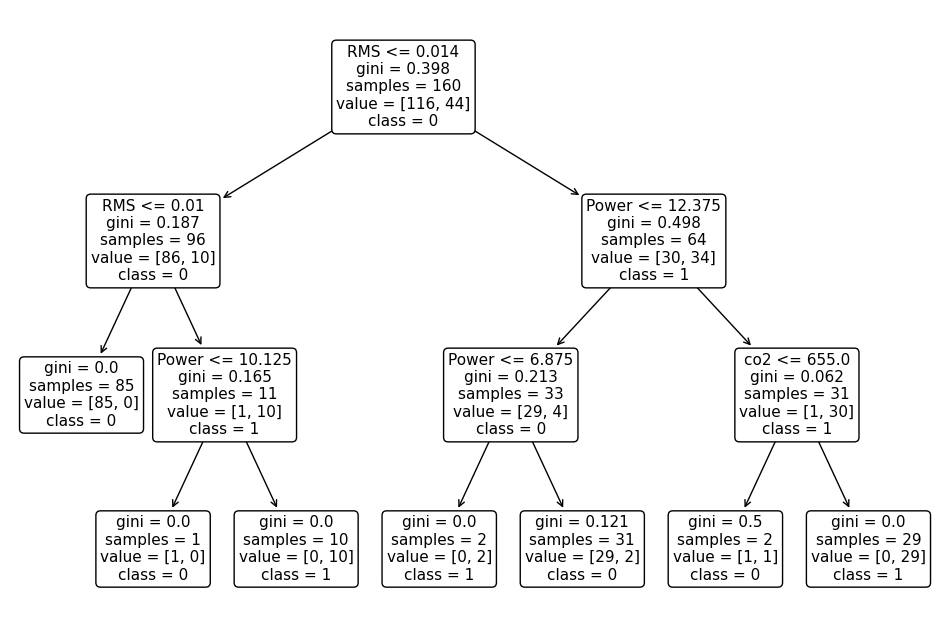

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(SER, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1'], rounded=True)
plt.show()

## 3 classes

In [24]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S2= pd.read_csv("final_H355.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([ 3.0,4.0])].index, 'labels']=2.0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([ 3.0,4.0])].index, 'labels']=2.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)
yt = Final_Data_S2.labels
Xt= Final_Data_S2.drop(['Time', 'labels'], axis=1)

In [25]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.85,stratify=yt, random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()

clf = DecisionTreeClassifier(max_depth=1)
clf = clf.fit(Xs, ys)

In [15]:
SER = copy.deepcopy(clf)
ser.SER(0,SER, X_train_t, y_train_t, original_ser=True)
print('ser original accuracy:', SER.score(X_test_t, y_test_t))
y_pred = SER.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser*:")
print(cm)

ser original accuracy: 0.8447136563876652
Weighted F1 score:  0.8507059351174019
precision: [0.94011976 0.62162162 0.54263566]
recall; [0.95731707 0.42331288 0.78651685]
fscore: [0.94864048 0.50364964 0.64220183]
support: [656 163  89]
accuracy: 0.8447136563876652
Confusion Matrix ser*:
[[628  26   2]
 [ 37  69  57]
 [  3  16  70]]


Micro-averaged One-vs-Rest ROC AUC score:
0.8835
Macro-averaged One-vs-Rest ROC AUC score:
0.8133


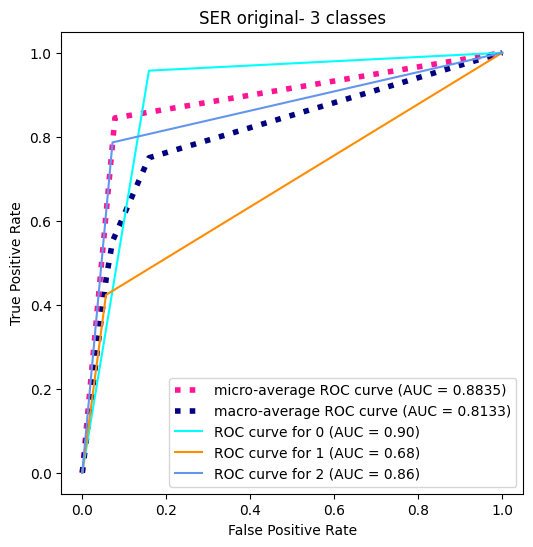

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(y_pred)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SER original- 3 classes")
plt.legend()
plt.show()

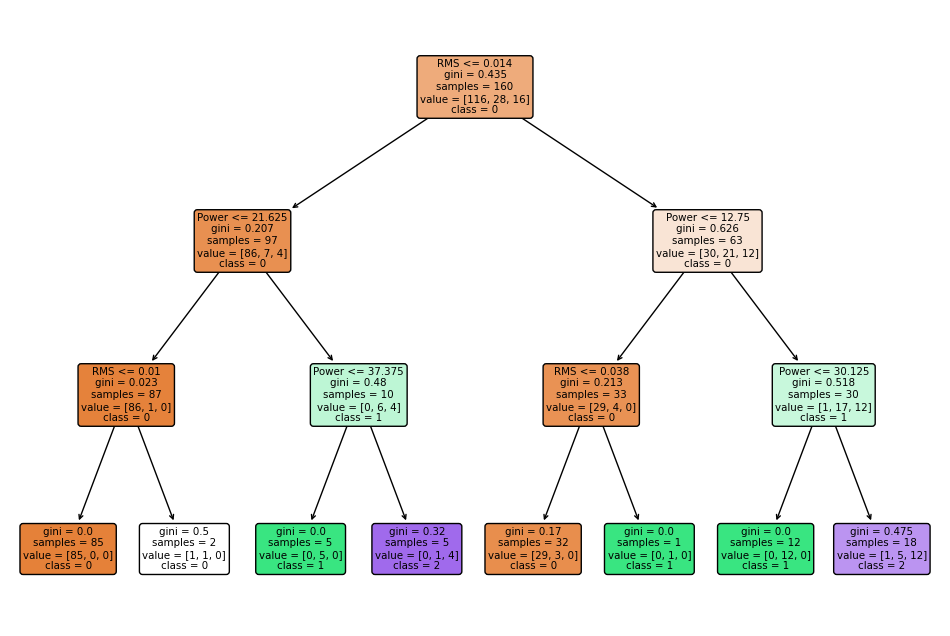

In [24]:
plt.figure(figsize=(12, 8))
plot_tree(SER, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], filled=True, rounded=True)
plt.show()

In [25]:
from sklearn.tree import  export_text
# Extract and print the decision rules
tree_rules = export_text(SER, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'])
print("Decision Rules:")
print(tree_rules)

Decision Rules:
|--- RMS <= 0.01
|   |--- Power <= 21.62
|   |   |--- RMS <= 0.01
|   |   |   |--- class: 0.0
|   |   |--- RMS >  0.01
|   |   |   |--- class: 0.0
|   |--- Power >  21.62
|   |   |--- Power <= 37.38
|   |   |   |--- class: 1.0
|   |   |--- Power >  37.38
|   |   |   |--- class: 2.0
|--- RMS >  0.01
|   |--- Power <= 12.75
|   |   |--- RMS <= 0.04
|   |   |   |--- class: 0.0
|   |   |--- RMS >  0.04
|   |   |   |--- class: 1.0
|   |--- Power >  12.75
|   |   |--- Power <= 30.12
|   |   |   |--- class: 1.0
|   |   |--- Power >  30.12
|   |   |   |--- class: 2.0



### SER-IMB

## 2 class

In [10]:
target_names = ['class 0', 'class 1']
cl_no_red = [1]
Nkmin = sum(y_train_t == cl_no_red)
root_source_values = lib_tree.get_node_distribution(clf, 0).reshape(-1)
props_s = root_source_values
props_s = props_s / sum(props_s)
props_t = np.zeros(props_s.size)
for k in range(props_s.size):
    props_t[k] = np.sum(y_train_t == k) / y_train_t.size
coeffs = np.divide(props_t, props_s)

In [13]:
ser_imb = copy.deepcopy(clf)
ser.SER(0, ser_imb, X_train_t, y_train_t, original_ser=False, no_red_on_cl=True, cl_no_red=cl_no_red, no_ext_on_cl=True, cl_no_ext=cl_no_red, ext_cond=True, leaf_loss_quantify=True, leaf_loss_threshold=0.2, coeffs=coeffs, root_source_values=root_source_values, Nkmin=Nkmin)
print('ser original accuracy:', ser_imb.score(X_test_t, y_test_t))
y_pred = ser_imb.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
roc_auc = roc_auc_score (y_test_t, y_pred)
f1_weighted = f1_score(y_test_t,y_pred, average='weighted')
print('Weighted F1 score: ', f1_weighted)
print('ROC AUC :', roc_auc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix:")
print(cm)
print('\n')
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
print("accuracy per class", accuracy_per_class)
macro_precision = precision_score(y_test_t, y_pred, average='macro')
micro_precision = precision_score(y_test_t, y_pred, average='micro')

# Calculate weighted average precision
weighted_precision = precision_score(y_test_t, y_pred, average='weighted')
print('macro precision:', macro_precision )

print('micro precision:', micro_precision )

print('weighted_precision:', weighted_precision )

print(classification_report(y_test_t, y_pred, target_names=target_names))

ser original accuracy: 0.9140969162995595
Weighted F1 score:  0.9130874175158895
ROC AUC : 0.8818960511033682
precision: [0.92878338 0.87179487]
recall; [0.95426829 0.80952381]
fscore: [0.94135338 0.83950617]
support: [656 252]
Confusion Matrix ser original:
[[626  30]
 [ 48 204]]


accuracy per class [0.95426829 0.80952381]
macro precision: 0.9002891272920946
micro precision: 0.9140969162995595
weighted_precision: 0.9129671881080396
              precision    recall  f1-score   support

     class 0       0.93      0.95      0.94       656
     class 1       0.87      0.81      0.84       252

    accuracy                           0.91       908
   macro avg       0.90      0.88      0.89       908
weighted avg       0.91      0.91      0.91       908



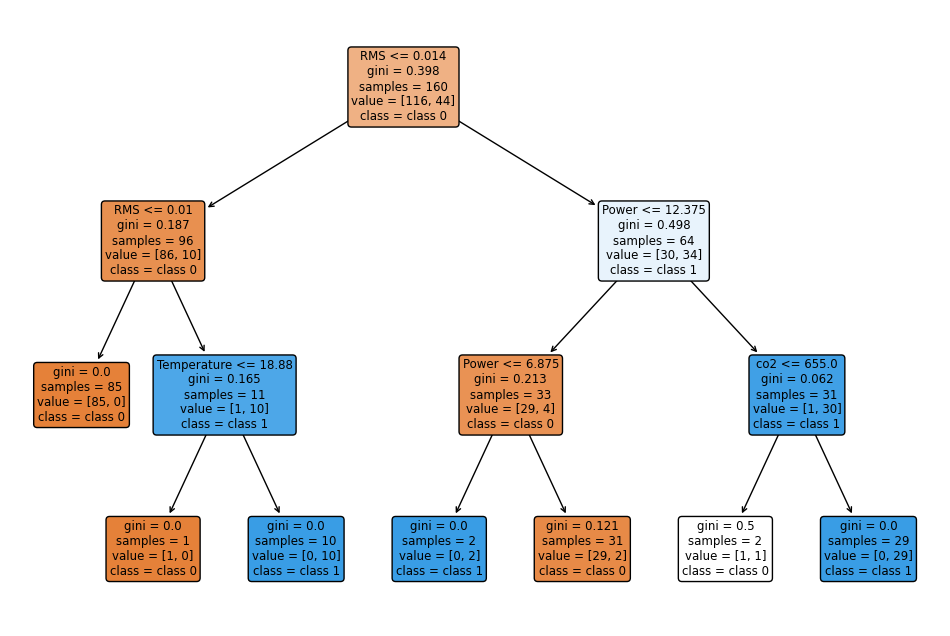

In [14]:
plt.figure(figsize=(12, 8))
plot_tree(ser_imb, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=target_names, filled=True, rounded=True)
plt.show()

## 3 classes

In [26]:
target_names = ['class 0', 'class 1', 'class 2']

In [27]:
cl_no_red = [1]
Nkmin = sum(y_train_t == cl_no_red)
root_source_values = lib_tree.get_node_distribution(clf, 0).reshape(-1)
props_s = root_source_values
props_s = props_s / sum(props_s)
props_t = np.zeros(props_s.size)
for k in range(props_s.size):
    props_t[k] = np.sum(y_train_t == k) / y_train_t.size
coeffs = np.divide(props_t, props_s)

In [28]:
ser_imb3 = copy.deepcopy(clf)
ser.SER(0, ser_imb3, X_train_t, y_train_t, original_ser=False, no_red_on_cl=True, cl_no_red=cl_no_red, no_ext_on_cl=True, cl_no_ext=cl_no_red, ext_cond=True, leaf_loss_quantify=True, leaf_loss_threshold=0.2, coeffs=coeffs, root_source_values=root_source_values, Nkmin=Nkmin)
print('ser* accuracy:', ser_imb3.score(X_test_t, y_test_t))
y_pred = ser_imb3.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score( y_test_t, y_pred, average='weighted')
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser*:")
print(cm)
print('\n')
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
print("accuracy per class", accuracy_per_class)
macro_precision = precision_score(y_test_t, y_pred, average='macro')
micro_precision = precision_score(y_test_t, y_pred, average='micro')

# Calculate weighted average precision
weighted_precision = precision_score(y_test_t, y_pred, average='weighted')
print('macro precision:', macro_precision )

print('micro precision:', micro_precision )

print('weighted_precision:', weighted_precision )

print(classification_report(y_test_t, y_pred, target_names=target_names))

ser* accuracy: 0.8513215859030837
Weighted F1 score:  0.8535056860075683
precision: [0.96111975 0.63265306 0.52542373]
recall; [0.94351145 0.56024096 0.71264368]
fscore: [0.95223421 0.5942492  0.60487805]
support: [655 166  87]
Confusion Matrix ser*:
[[618  33   4]
 [ 21  93  52]
 [  4  21  62]]


accuracy per class [0.94351145 0.56024096 0.71264368]
macro precision: 0.7063988470681521
micro precision: 0.8513215859030837
weighted_precision: 0.859323468704892
              precision    recall  f1-score   support

     class 0       0.96      0.94      0.95       655
     class 1       0.63      0.56      0.59       166
     class 2       0.53      0.71      0.60        87

    accuracy                           0.85       908
   macro avg       0.71      0.74      0.72       908
weighted avg       0.86      0.85      0.85       908



Micro-averaged One-vs-Rest ROC AUC score:
0.8885
Macro-averaged One-vs-Rest ROC AUC score:
0.8294


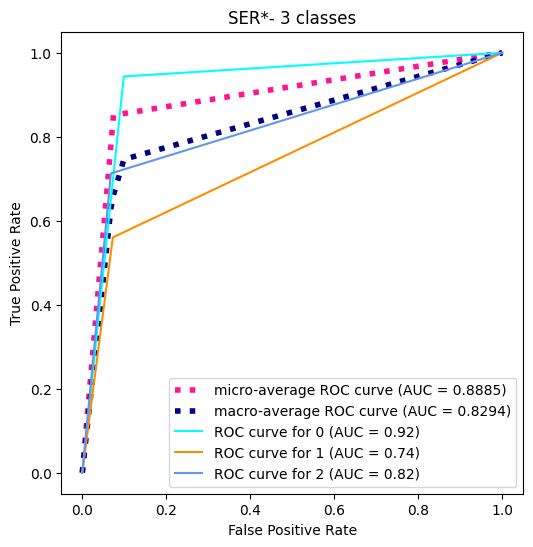

In [29]:
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])
y_pred_onehot = label_binarizer.transform(y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SER*- 3 classes")
plt.legend()
plt.show()

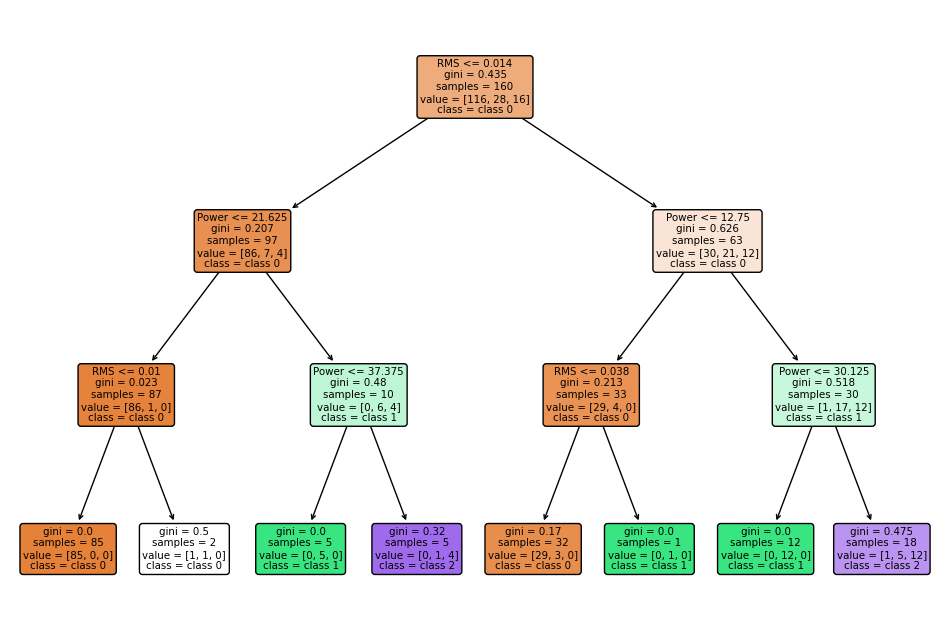

In [41]:
plt.figure(figsize=(12, 8))
plot_tree(ser_imb3, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=target_names, filled=True, rounded=True)
plt.show()